In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect('/Users/orestis/MyProjects/InvestorAPI/app/database/ibd.db')
query = "SELECT * FROM price_prediction_dataset ORDER BY DATE(fiscal_date_ending)"

stocks_df = pd.read_sql(query, conn)

In [3]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58504 entries, 0 to 58503
Data columns (total 98 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   symbol                                                               58504 non-null  object 
 1   fiscal_date_ending                                                   58504 non-null  object 
 2   reported_currency                                                    58504 non-null  object 
 3   gross_profit                                                         58504 non-null  float64
 4   total_revenue                                                        58504 non-null  float64
 5   cost_of_revenue                                                      58504 non-null  float64
 6   cost_of_goods_and_services_sold                                      58504 non-null  float64
 7   oper

## Drop rows with null values

In [4]:
columns_with_null = stocks_df.columns[stocks_df.isna().any()].tolist()
stocks_df.dropna(subset=columns_with_null, inplace=True)
stocks_df.reset_index(inplace=True)

## Split the data in training and test set

In [5]:
from typing import Tuple
import datetime as dt

def split_data_to_train_and_test(
    df: pd.DataFrame,
    cutoff_date: dt.datetime,
    cutoff_date_column_name: str = "fiscal_date_ending"
) -> Tuple[pd.DataFrame, pd.DataFrame]:
    """
    Returns (train_set_df, test_set_df)
    """
    df['DateColumn'] = pd.to_datetime(df['fiscal_date_ending'])
    # Split the data into train and test based on the cutoff date
    train_set = df[df['DateColumn'] < cutoff_date].copy()
    test_set = df[df['DateColumn'] >= cutoff_date].copy()

    train_set.drop(['DateColumn',], axis=1, inplace=True)
    test_set.drop(['DateColumn',], axis=1, inplace=True)
    
    train_set = train_set.reset_index(drop=True)
    test_set = test_set.reset_index(drop=True)

    return train_set, test_set

In [6]:
train_set, test_set = split_data_to_train_and_test(df=stocks_df.copy(), cutoff_date=dt.datetime(2023, 6, 1))

In [7]:
train_set.drop(['index', 'symbol', 'fiscal_date_ending', 'reported_currency' ], axis=1, inplace=True)
test_set.drop(['index', 'symbol', 'fiscal_date_ending', 'reported_currency' ], axis=1, inplace=True)

In [7]:
train_set.head()

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,change_in_exchange_rate,sector,avg_interest_rate,avg_treasury_yield,avg_natural_gas_price,avg_oil_price,avg_unemployment_rate,avg_global_commodities_index_value,inflation,price
0,2417031.0,5689043.0,3272012.0,3272012.0,1658477.0,795212.0,0.0,794643.0,0.0,-26922.0,...,324844.0,LIFE SCIENCES,0.073333,2.046667,3.326667,94.013333,8.633333,175.032280,3.156842,1.750000
1,1686513.0,5284750.0,3598237.0,3598237.0,-269682.0,1992276.0,0.0,2725727.0,0.0,-28221.0,...,257799.0,LIFE SCIENCES,0.103333,2.036667,2.450000,102.876667,8.266667,181.335364,3.156842,2.196667
2,1241275.0,3315931.0,2074656.0,2074656.0,454820.0,809392.0,0.0,1036063.0,0.0,-27163.0,...,41252.0,LIFE SCIENCES,0.153333,1.823333,2.280000,93.426667,8.200000,171.818546,2.069337,2.100000
3,2740468.0,6983128.0,4242660.0,4242660.0,1928212.0,901732.0,0.0,832032.0,0.0,-37741.0,...,-247599.0,LIFE SCIENCES,0.143333,1.643333,2.880000,92.180000,8.033333,170.295168,2.069337,1.776667
4,2067378.0,5529120.0,3461742.0,3461742.0,1411658.0,749865.0,0.0,888682.0,0.0,-43061.0,...,211511.0,LIFE SCIENCES,0.160000,1.706667,3.400000,87.960000,7.800000,170.093088,2.069337,1.760000


In [8]:
test_set.head()

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,change_in_exchange_rate,sector,avg_interest_rate,avg_treasury_yield,avg_natural_gas_price,avg_oil_price,avg_unemployment_rate,avg_global_commodities_index_value,inflation,price
0,4.244000e+09,4.816000e+09,5.720000e+08,54000000.0,1.624000e+09,1.702000e+09,876000000.0,2.620000e+09,0.0,-26000000.0,...,0.0,TECHNOLOGY,5.225,4.035,2.565,78.730000,3.65,159.638368,4.64285,531.500000
1,3.547000e+08,9.567000e+08,6.020000e+08,602000000.0,1.160000e+07,2.741000e+08,34700000.0,3.431000e+08,0.0,-19100000.0,...,0.0,MANUFACTURING,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285,17.816667
2,2.567750e+08,8.982390e+08,6.414640e+08,641464000.0,9.015000e+07,1.666250e+08,0.0,1.720461e+08,932000.0,-33131000.0,...,0.0,LIFE SCIENCES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285,72.690000
3,1.178526e+09,5.653162e+09,4.474636e+09,2057000.0,-3.271360e+08,1.255223e+09,0.0,1.505662e+09,0.0,-65220000.0,...,0.0,TRADE & SERVICES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285,1.300000
4,1.980920e+08,6.886800e+08,5.549810e+08,490588000.0,1.362250e+08,6.215900e+07,0.0,6.410100e+07,0.0,-9542000.0,...,0.0,LIFE SCIENCES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285,46.326667


In [12]:
y_train = train_set['price']
X_train = train_set.drop(['price'], axis=1)

y_test = test_set['price']
X_test = test_set.drop(['price'], axis=1)

In [13]:
y_train

0          1.750000
1          2.196667
2          2.100000
3          1.776667
4          1.760000
            ...    
53942     26.935000
53943    125.935000
53944     14.245000
53945     22.470000
53946    259.465000
Name: price, Length: 53947, dtype: float64

In [14]:
X_train

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,change_in_cash_and_cash_equivalents,change_in_exchange_rate,sector,avg_interest_rate,avg_treasury_yield,avg_natural_gas_price,avg_oil_price,avg_unemployment_rate,avg_global_commodities_index_value,inflation
0,2.417031e+06,5.689043e+06,3.272012e+06,3.272012e+06,1658477.0,795212.0,0.0,794643.0,0.0,-26922.0,...,-407116.0,324844.0,LIFE SCIENCES,0.073333,2.046667,3.326667,94.013333,8.633333,175.032280,3.156842
1,1.686513e+06,5.284750e+06,3.598237e+06,3.598237e+06,-269682.0,1992276.0,0.0,2725727.0,0.0,-28221.0,...,1093579.0,257799.0,LIFE SCIENCES,0.103333,2.036667,2.450000,102.876667,8.266667,181.335364,3.156842
2,1.241275e+06,3.315931e+06,2.074656e+06,2.074656e+06,454820.0,809392.0,0.0,1036063.0,0.0,-27163.0,...,-1395216.0,41252.0,LIFE SCIENCES,0.153333,1.823333,2.280000,93.426667,8.200000,171.818546,2.069337
3,2.740468e+06,6.983128e+06,4.242660e+06,4.242660e+06,1928212.0,901732.0,0.0,832032.0,0.0,-37741.0,...,-1191328.0,-247599.0,LIFE SCIENCES,0.143333,1.643333,2.880000,92.180000,8.033333,170.295168,2.069337
4,2.067378e+06,5.529120e+06,3.461742e+06,3.461742e+06,1411658.0,749865.0,0.0,888682.0,0.0,-43061.0,...,2057539.0,211511.0,LIFE SCIENCES,0.160000,1.706667,3.400000,87.960000,7.800000,170.093088,2.069337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53942,1.582193e+07,1.674173e+07,9.197960e+05,-3.463000e+10,-2851160.0,830728.0,0.0,18673093.0,29557786.0,-1420162.0,...,-2066914.0,0.0,TECHNOLOGY,5.176667,3.940000,2.436667,75.903333,3.633333,157.781959,4.642850
53943,5.322100e+07,1.645530e+08,1.113320e+08,1.113320e+08,26957000.0,21742000.0,4522000.0,26264000.0,680000.0,-1225000.0,...,0.0,0.0,TECHNOLOGY,5.176667,3.940000,2.436667,75.903333,3.633333,157.781959,4.642850
53944,7.839400e+07,1.864520e+08,1.080580e+08,5.420300e+07,-39629000.0,41113000.0,25899000.0,78652000.0,0.0,921000.0,...,0.0,0.0,TRADE & SERVICES,5.176667,3.940000,2.436667,75.903333,3.633333,157.781959,4.642850
53945,1.231820e+08,4.711910e+08,2.373170e+08,1.186280e+08,23425000.0,92703000.0,7054000.0,99757000.0,0.0,-9854000.0,...,0.0,0.0,LIFE SCIENCES,5.176667,3.940000,2.436667,75.903333,3.633333,157.781959,4.642850


In [15]:
y_test

0       531.500000
1        17.816667
2        72.690000
3         1.300000
4        46.326667
           ...    
3153     69.460000
3154     98.775000
3155     61.515000
3156     72.025000
3157     10.165000
Name: price, Length: 3158, dtype: float64

In [17]:
X_test

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,change_in_cash_and_cash_equivalents,change_in_exchange_rate,sector,avg_interest_rate,avg_treasury_yield,avg_natural_gas_price,avg_oil_price,avg_unemployment_rate,avg_global_commodities_index_value,inflation
0,4.244000e+09,4.816000e+09,5.720000e+08,5.400000e+07,1.624000e+09,1.702000e+09,876000000.0,2.620000e+09,0.0,-26000000.0,...,0.0,0.0,TECHNOLOGY,5.225,4.035,2.565,78.730000,3.65,159.638368,4.64285
1,3.547000e+08,9.567000e+08,6.020000e+08,6.020000e+08,1.160000e+07,2.741000e+08,34700000.0,3.431000e+08,0.0,-19100000.0,...,4500000.0,0.0,MANUFACTURING,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285
2,2.567750e+08,8.982390e+08,6.414640e+08,6.414640e+08,9.015000e+07,1.666250e+08,0.0,1.720461e+08,932000.0,-33131000.0,...,0.0,0.0,LIFE SCIENCES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285
3,1.178526e+09,5.653162e+09,4.474636e+09,2.057000e+06,-3.271360e+08,1.255223e+09,0.0,1.505662e+09,0.0,-65220000.0,...,-21624000.0,0.0,TRADE & SERVICES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285
4,1.980920e+08,6.886800e+08,5.549810e+08,4.905880e+08,1.362250e+08,6.215900e+07,0.0,6.410100e+07,0.0,-9542000.0,...,71210000.0,0.0,LIFE SCIENCES,5.260,4.150,2.590,82.296667,3.70,162.560469,4.64285
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3153,6.967650e+08,7.073836e+09,6.377071e+09,4.020000e+07,3.295400e+07,5.856940e+08,0.0,6.638110e+08,0.0,264900000.0,...,0.0,0.0,TRADE & SERVICES,5.330,4.380,2.640,89.430000,3.80,168.404670,4.64285
3154,9.712730e+08,1.396062e+10,1.298934e+10,1.298934e+10,2.402330e+08,6.594540e+08,0.0,7.310400e+08,0.0,-67703000.0,...,0.0,0.0,TECHNOLOGY,5.330,4.380,2.640,89.430000,3.80,168.404670,4.64285
3155,1.974890e+08,1.193256e+09,9.957670e+08,9.957670e+08,7.770500e+07,1.123480e+08,0.0,1.415150e+08,0.0,-3083000.0,...,0.0,0.0,MANUFACTURING,5.330,4.380,2.640,89.430000,3.80,168.404670,4.64285
3156,6.228000e+08,1.684700e+09,1.061900e+09,1.061900e+09,2.450000e+08,3.717000e+08,0.0,3.717000e+08,0.0,-52700000.0,...,0.0,0.0,MANUFACTURING,5.330,4.380,2.640,89.430000,3.80,168.404670,4.64285


In [18]:
from typing import List, Optional

from sklearn.preprocessing import OneHotEncoder

def perform_one_hot_encoding(
    df: pd.DataFrame,
    encoder: OneHotEncoder,
    fit: bool = False,
    categorical_columns: Optional[List[str]] = None
) -> pd.DataFrame:
    """
    Given a dataframe with categorical columns this function will return a new dataframe
    that will replace these columns with the one hot encoding ones and will leave the rest
    of the columns unchanged.
    params:
    - fit -> If fit is True then fit_transform is called , otherwise only transform
    - categorical_columns -> A list with the names of the categorical columns we want to
    transform. If not given then columns with type category are used
    """

    if categorical_columns is None:
        categorical_columns = df.select_dtypes(include='category').columns.tolist()

    if fit: 
        encoded_df = pd.DataFrame(encoder.fit_transform(df[categorical_columns]).toarray(), columns=encoder.get_feature_names_out())
    else:
        encoded_df = pd.DataFrame(encoder.transform(df[categorical_columns]).toarray(), columns=encoder.get_feature_names_out())

    #merge one-hot encoded columns back with original DataFrame
    final_df = df.join(encoded_df)

    # Drop original categorical columns
    final_df.drop(categorical_columns, axis=1, inplace=True)

    return final_df.reset_index(drop=True)


In [37]:
from typing import List, Optional

from sklearn.preprocessing import MinMaxScaler

def perform_min_max_scaling(
    df: pd.DataFrame,
    min_max_scaler: MinMaxScaler,
    fit: bool = False,
    columns_to_scale: Optional[List[str]] = None
) -> pd.DataFrame:
    """
    Given a dataframe with numerical columns this function will return a new dataframe
    that will perform min max scaling on these columns and will leave the rest
    of the columns unchanged.
    params:
    - fit -> If fit is True then fit_transform is called , otherwise only transform
    - columns_to_scale -> A list with the names of the numerical columns we want to
    transform. If not given then columns with type float64 are used
    """

    if columns_to_scale is None:
        columns_to_scale = df.select_dtypes(include='float64').columns.tolist()

    scaled_df = df.copy()
    # Scale the specified columns
    if fit:
        scaled_df[columns_to_scale] = min_max_scaler.fit_transform(df[columns_to_scale])
    else:
        scaled_df[columns_to_scale] = min_max_scaler.transform(df[columns_to_scale])

    return scaled_df


def min_max_scale_transformation_on_target(
    target: pd.Series,
    min_max_scaler: MinMaxScaler,
    inverse: bool = False,
    fit: bool = False
) -> pd.Series:
    if fit:
        min_max_scaler.fit(target.values.reshape(-1, 1))
    
    if inverse:
        return pd.Series(
            min_max_scaler.inverse_transform(
                target.values.reshape(-1, 1)
            ).flatten()
        )
    
    return pd.Series(
        min_max_scaler.transform(
            target.values.reshape(-1, 1)
        ).flatten()
    )

In [21]:
float_columns = X_train.select_dtypes(include=['float64'])

# Get the column names of the selected columns
columns_to_scale = list(float_columns.columns)
columns_to_scale

['gross_profit',
 'total_revenue',
 'cost_of_revenue',
 'cost_of_goods_and_services_sold',
 'operating_income',
 'selling_general_and_administrative',
 'research_and_development',
 'operating_expenses',
 'investment_income_net',
 'net_interest_income',
 'interest_income',
 'interest_expense',
 'non_interest_income',
 'other_non_operating_income',
 'depreciation',
 'depreciation_and_amortization',
 'income_before_tax',
 'income_tax_expense',
 'interest_and_debt_expense',
 'net_income_from_continuing_operations',
 'comprehensive_income_net_of_tax',
 'ebit',
 'ebitda',
 'net_income',
 'total_assets',
 'total_current_assets',
 'cash_and_cash_equivalents_at_carrying_value',
 'cash_and_short_term_investments',
 'inventory',
 'current_net_receivables',
 'total_non_current_assets',
 'property_plant_equipment',
 'accumulated_depreciation_amortization_ppe',
 'intangible_assets',
 'intangible_assets_excluding_goodwill',
 'goodwill',
 'investments',
 'long_term_investments',
 'short_term_investmen

In [22]:
categorical_columns = ['sector']

In [23]:
encoder = OneHotEncoder()
one_hot_encoded_train_set = perform_one_hot_encoding(
    df=X_train,
    categorical_columns=categorical_columns,
    encoder=encoder,
    fit=True
)

one_hot_encoded_test_set = perform_one_hot_encoding(
    df=X_test,
    categorical_columns=categorical_columns,
    encoder=encoder,
    fit=False
)

In [24]:
one_hot_encoded_train_set.head()

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,avg_unemployment_rate,avg_global_commodities_index_value,inflation,sector_ENERGY & TRANSPORTATION,sector_FINANCE,sector_LIFE SCIENCES,sector_MANUFACTURING,sector_REAL ESTATE & CONSTRUCTION,sector_TECHNOLOGY,sector_TRADE & SERVICES
0,2417031.0,5689043.0,3272012.0,3272012.0,1658477.0,795212.0,0.0,794643.0,0.0,-26922.0,...,8.633333,175.032280,3.156842,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1686513.0,5284750.0,3598237.0,3598237.0,-269682.0,1992276.0,0.0,2725727.0,0.0,-28221.0,...,8.266667,181.335364,3.156842,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1241275.0,3315931.0,2074656.0,2074656.0,454820.0,809392.0,0.0,1036063.0,0.0,-27163.0,...,8.200000,171.818546,2.069337,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,2740468.0,6983128.0,4242660.0,4242660.0,1928212.0,901732.0,0.0,832032.0,0.0,-37741.0,...,8.033333,170.295168,2.069337,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2067378.0,5529120.0,3461742.0,3461742.0,1411658.0,749865.0,0.0,888682.0,0.0,-43061.0,...,7.800000,170.093088,2.069337,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [25]:
scaler = MinMaxScaler(feature_range=(-1, 1))
scaled_train_set = perform_min_max_scaling(
    df=one_hot_encoded_train_set,
    min_max_scaler=scaler,
    fit=True,
    columns_to_scale=columns_to_scale
)

scaled_test_set = perform_min_max_scaling(
    df=one_hot_encoded_test_set,
    min_max_scaler=scaler,
    fit=False,
    columns_to_scale=columns_to_scale
)

In [26]:
scaled_train_set

,gross_profit,total_revenue,cost_of_revenue,cost_of_goods_and_services_sold,operating_income,selling_general_and_administrative,research_and_development,operating_expenses,investment_income_net,net_interest_income,...,avg_unemployment_rate,avg_global_commodities_index_value,inflation,sector_ENERGY & TRANSPORTATION,sector_FINANCE,sector_LIFE SCIENCES,sector_MANUFACTURING,sector_REAL ESTATE & CONSTRUCTION,sector_TECHNOLOGY,sector_TRADE & SERVICES
0,-0.456465,-0.996678,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389586,0.186686,-0.346220,...,-0.017544,0.176503,-0.229288,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,-0.456465,-0.996678,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389586,0.186686,-0.346220,...,-0.087719,0.262085,-0.229288,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.456465,-0.996678,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389586,0.186686,-0.346220,...,-0.100478,0.132868,-0.505158,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-0.456465,-0.996678,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389586,0.186686,-0.346220,...,-0.132376,0.112184,-0.505158,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.456465,-0.996678,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389586,0.186686,-0.346220,...,-0.177033,0.109440,-0.505158,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53942,-0.456464,-0.996677,-0.999999,-0.999999,-0.216222,-0.999428,-0.999516,-0.389585,0.192389,-0.346220,...,-0.974482,-0.057718,0.147672,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53943,-0.456462,-0.996671,-0.999999,-0.999999,-0.216220,-0.999428,-0.999514,-0.389584,0.186817,-0.346220,...,-0.974482,-0.057718,0.147672,0.0,0.0,0.0,0.0,0.0,1.0,0.0
53944,-0.456460,-0.996670,-0.999999,-0.999999,-0.216225,-0.999428,-0.999507,-0.389579,0.186686,-0.346220,...,-0.974482,-0.057718,0.147672,0.0,0.0,0.0,0.0,0.0,0.0,1.0
53945,-0.456458,-0.996657,-0.999999,-0.999999,-0.216220,-0.999427,-0.999513,-0.389578,0.186686,-0.346223,...,-0.974482,-0.057718,0.147672,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [38]:
target_scaler = MinMaxScaler()
y_train_scaled = min_max_scale_transformation_on_target(
    target=y_train,
    min_max_scaler=target_scaler,
    fit=True
)

y_test_scaled = min_max_scale_transformation_on_target(
    target=y_test,
    min_max_scaler=target_scaler,
    fit=False
)

In [39]:
y_train_scaled

0        0.000288
1        0.000367
2        0.000350
3        0.000293
4        0.000290
           ...   
53942    0.004709
53943    0.022087
53944    0.002482
53945    0.003925
53946    0.045525
Length: 53947, dtype: float64

In [40]:
y_train

0          1.750000
1          2.196667
2          2.100000
3          1.776667
4          1.760000
            ...    
53942     26.935000
53943    125.935000
53944     14.245000
53945     22.470000
53946    259.465000
Name: price, Length: 53947, dtype: float64

In [41]:
y_train_scaled_reversed = min_max_scale_transformation_on_target(
    target=y_train_scaled,
    min_max_scaler=target_scaler,
    fit=False,
    inverse=True
)

y_train_scaled_reversed

0          1.750000
1          2.196667
2          2.100000
3          1.776667
4          1.760000
            ...    
53942     26.935000
53943    125.935000
53944     14.245000
53945     22.470000
53946    259.465000
Length: 53947, dtype: float64

## Correlation feature selection for numerical data

Feature 0: 6.980390
Feature 1: 7.986670
Feature 2: 0.436592
Feature 3: 0.436597
Feature 4: 4.679691
Feature 5: 0.848845
Feature 6: 0.338313
Feature 7: 3.813745
Feature 8: 74.997679
Feature 9: 4.316830
Feature 10: 10.106138
Feature 11: 10.409253
Feature 12: 1396.916927
Feature 13: 65.741651
Feature 14: 20.949044
Feature 15: 6.071738
Feature 16: 1.755028
Feature 17: 1.394956
Feature 18: 54.601390
Feature 19: 1.082376
Feature 20: 2892.984802
Feature 21: 4.210557
Feature 22: 5.722525
Feature 23: 0.747322
Feature 24: 18.060600
Feature 25: 17.669441
Feature 26: 0.041562
Feature 27: 0.041515
Feature 28: 0.149622
Feature 29: 1740.894926
Feature 30: 16.942879
Feature 31: 7.713063
Feature 32: 115.131586
Feature 33: 0.078024
Feature 34: 0.101687
Feature 35: 0.182516
Feature 36: 30.952608
Feature 37: 9.974220
Feature 38: 6.703733
Feature 39: 6.928102
Feature 40: 1012.902197
Feature 41: 17.023527
Feature 42: 4.583218
Feature 43: 1924.861277
Feature 44: 379.979700
Feature 45: 89.126079
Feature 46: 0

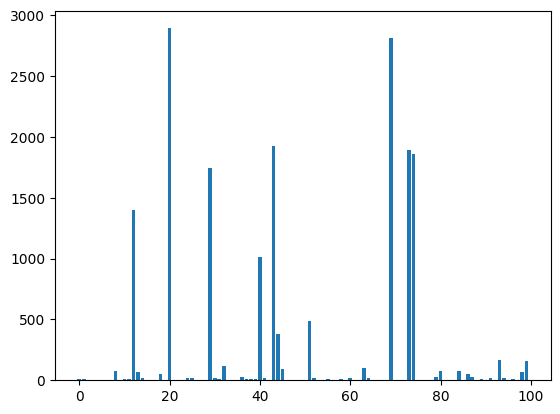

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(scaled_train_set, y_train_scaled, scaled_test_set)

# what are scores for the features
correlation_scores = list()
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    correlation_scores.append((i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

## Mutual information feature selection for numerical input data

Feature 0: 0.124299
Feature 1: 0.118727
Feature 2: 0.032964
Feature 3: 0.026512
Feature 4: 0.116577
Feature 5: 0.080462
Feature 6: 0.029516
Feature 7: 0.099245
Feature 8: 0.028302
Feature 9: 0.060076
Feature 10: 0.023399
Feature 11: 0.038177
Feature 12: 0.105066
Feature 13: 0.037318
Feature 14: 0.052356
Feature 15: 0.053606
Feature 16: 0.133811
Feature 17: 0.092513
Feature 18: 0.055275
Feature 19: 0.125673
Feature 20: 0.170222
Feature 21: 0.125740
Feature 22: 0.110125
Feature 23: 0.134235
Feature 24: 0.081555
Feature 25: 0.107924
Feature 26: 0.033016
Feature 27: 0.035193
Feature 28: 0.025266
Feature 29: 0.096413
Feature 30: 0.068176
Feature 31: 0.066901
Feature 32: 0.066908
Feature 33: 0.074471
Feature 34: 0.052580
Feature 35: 0.058647
Feature 36: 0.049437
Feature 37: 0.031119
Feature 38: 0.017653
Feature 39: 0.055228
Feature 40: 0.095977
Feature 41: 0.075244
Feature 42: 0.080782
Feature 43: 0.071209
Feature 44: 0.050707
Feature 45: 0.051040
Feature 46: 0.032247
Feature 47: 0.057916
Fe

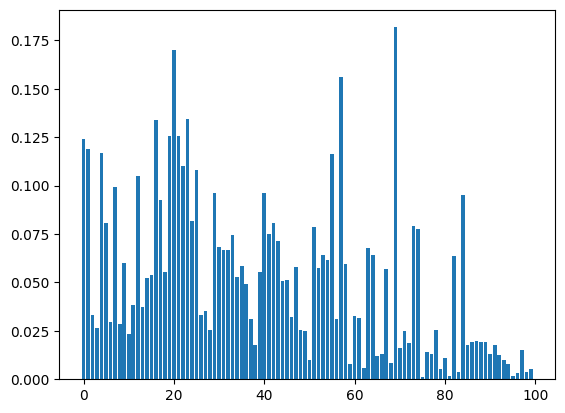

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features(scaled_train_set, y_train_scaled, scaled_test_set)

# what are scores for the features
mutual_info_scores = list()
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    mutual_info_scores.append((i, fs.scores_[i]))

# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [47]:
mutual_info_scores_sorted = sorted(mutual_info_scores, key=lambda x: x[1], reverse=True)

for mutual_info_score in mutual_info_scores_sorted:
    index = mutual_info_score[0]
    score = mutual_info_score[1]
    print(f"{scaled_train_set.columns[index]} -> {score}")

profit_loss -> 0.18174619840580508
comprehensive_income_net_of_tax -> 0.17022160124123786
retained_earnings -> 0.15595755783563048
net_income -> 0.13423467063462047
income_before_tax -> 0.13381132524429074
ebit -> 0.12573992766595055
net_income_from_continuing_operations -> 0.12567278327263987
gross_profit -> 0.12429902630010714
total_revenue -> 0.1187268332644611
operating_income -> 0.11657691640733159
total_shareholder_equity -> 0.11653485919899431
ebitda -> 0.11012517151741141
total_current_assets -> 0.10792386334918902
non_interest_income -> 0.10506608012861829
operating_expenses -> 0.09924541949688859
current_net_receivables -> 0.09641307322012516
other_non_current_assets -> 0.09597738026138947
change_in_cash_and_cash_equivalents -> 0.09489502093827173
income_tax_expense -> 0.09251276542657871
total_assets -> 0.08155476025857489
total_current_liabilities -> 0.08078213966228409
selling_general_and_administrative -> 0.08046230729430737
payments_for_repurchase_of_common_stock -> 0.07

In [48]:
correlation_scores_sorted = sorted(correlation_scores, key=lambda x: x[1], reverse=True)

for correlation_score in correlation_scores_sorted:
    index = correlation_score[0]
    score = correlation_score[1]
    print(f"{scaled_train_set.columns[index]} -> {score}")

comprehensive_income_net_of_tax -> 2892.9848016031947
profit_loss -> 2814.0065338589798
current_accounts_payable -> 1924.8612765273012
payments_for_repurchase_of_common_stock -> 1893.0308884812302
payments_for_repurchase_of_equity -> 1857.7390913463778
current_net_receivables -> 1740.8949257107604
non_interest_income -> 1396.9169274972223
other_non_current_assets -> 1012.9021967506599
long_term_debt_noncurrent -> 489.4295219117567
deferred_revenue -> 379.9796996012072
sector_ENERGY & TRANSPORTATION -> 167.70354678260048
sector_TRADE & SERVICES -> 158.80338855644666
accumulated_depreciation_amortization_ppe -> 115.13158610644516
change_in_operating_liabilities -> 100.14868439873257
current_debt -> 89.12607937493719
change_in_cash_and_cash_equivalents -> 79.66555146868562
proceeds_from_issuance_of_long_term_debt_and_capital_securities_net -> 77.8805603536422
investment_income_net -> 74.99767948693741
sector_TECHNOLOGY -> 66.60729887001675
other_non_operating_income -> 65.7416509409963
in